In [1]:
# Packages / libraries
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV
import os  # provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind': '{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize': (12, 10)})

### LOADING THE RAW DATA ###

In [2]:
# Loading the data
df = pd.read_csv('Data/CSV/quar.csv')

# print the shape
print(df.shape)

df['D_or_ND'][df['D_or_ND'] == 'D'] = 1
df['D_or_ND'][df['D_or_ND'] == 'ND'] = 0

# runs the first 5 rows
df.head(5)


(46, 12)


,Unnamed: 0,Unnamed: 0.1,D_or_ND,max_word_length_quar,Most_common_word_length_quar,Occurence_perc_quar,Unique_occ_perc_quar,Noun_perc_quar,Verb_perc_quar,Adj_perc_quar,Pron_perc_quar,Adv_perc_quar
0,0,0,0,3,1,3,1,4,2,1,2,3
1,1,1,0,3,1,4,2,1,4,4,3,4
2,2,2,0,2,1,4,2,1,4,4,4,4
3,3,3,0,4,1,2,3,1,3,2,4,4
4,4,4,0,1,4,3,2,2,4,3,3,2


In [3]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

df.head(5)


,D_or_ND,max_word_length_quar,Most_common_word_length_quar,Occurence_perc_quar,Unique_occ_perc_quar,Noun_perc_quar,Verb_perc_quar,Adj_perc_quar,Pron_perc_quar,Adv_perc_quar
0,0,3,1,3,1,4,2,1,2,3
1,0,3,1,4,2,1,4,4,3,4
2,0,2,1,4,2,1,4,4,4,4
3,0,4,1,2,3,1,3,2,4,4
4,0,1,4,3,2,2,4,3,3,2


In [4]:
# Investigate all the elements whithin each Feature
# Hvad er ideen bag dette?

for column in df:
    unique_values = np.unique(df[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column,
                                                                        nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))


The number of values for feature D_or_ND is: 2 -- [0 1]
The number of values for feature max_word_length_quar is: 4 -- [1 2 3 4]
The number of values for feature Most_common_word_length_quar is: 4 -- [1 2 3 4]
The number of values for feature Occurence_perc_quar is: 4 -- [1 2 3 4]
The number of values for feature Unique_occ_perc_quar is: 4 -- [1 2 3 4]
The number of values for feature Noun_perc_quar is: 4 -- [1 2 3 4]
The number of values for feature Verb_perc_quar is: 4 -- [1 2 3 4]
The number of values for feature Adj_perc_quar is: 4 -- [1 2 3 4]
The number of values for feature Pron_perc_quar is: 4 -- [1 2 3 4]
The number of values for feature Adv_perc_quar is: 4 -- [1 2 3 4]


<AxesSubplot:xlabel='D_or_ND', ylabel='count'>

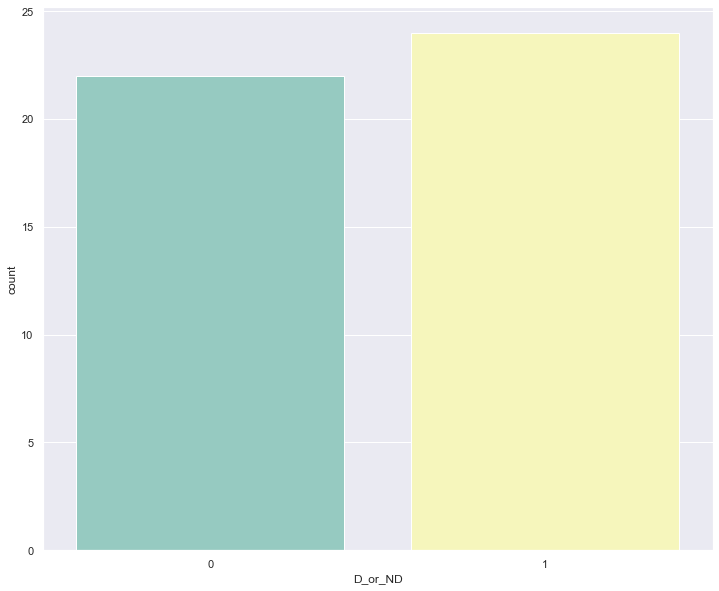

In [5]:
# Investigating the distr of y
sns.countplot(x='D_or_ND', data=df, palette='Set3')


In [6]:
# Looping through all the features by our y variable - see if there is relationship

features = ['D_or_ND', 'max_word_length_quar', 'Most_common_word_length_quar',
            'Occurence_perc_quar', 'Unique_occ_perc_quar', 'Noun_perc_quar',
            'Verb_perc_quar', 'Adj_perc_quar', 'Pron_perc_quar', 'Adv_perc_quar']


In [7]:
# Split the data into X & y

X = df.drop('D_or_ND', axis=1)
y = df['D_or_ND']

X
y

y = y.astype(int)

print(X.shape)
print(y.shape)


(46, 9)
(46,)


In [8]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

#dt = tree.DecisionTreeClassifier()
#dt.fit(X, y)

dt = DecisionTreeClassifier(random_state=1, criterion = 'gini')
dt.fit(X,y)


#dt = DecisionTreeClassifier(criterion = 'gini')
#dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


DecisionTreeClassifier(random_state=1)

In [9]:
# Running Feature Importance

fi_col = []
fi = []

for i, column in enumerate(df.drop('D_or_ND', axis=1)):
    print('The feature importance for {} is : {}'.format(
        column, dt.feature_importances_[i]))

    fi_col.append(column)
    fi.append(dt.feature_importances_[i])


The feature importance for max_word_length_quar is : 0.01936026936026936
The feature importance for Most_common_word_length_quar is : 0.5160984848484849
The feature importance for Occurence_perc_quar is : 0.0
The feature importance for Unique_occ_perc_quar is : 0.1600884384975294
The feature importance for Noun_perc_quar is : 0.043560606060606064
The feature importance for Verb_perc_quar is : 0.05346074380165288
The feature importance for Adj_perc_quar is : 0.0
The feature importance for Pron_perc_quar is : 0.0
The feature importance for Adv_perc_quar is : 0.20743145743145744


In [10]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns=['Feature', 'Feature Importance'])
fi_df


,Feature,Feature Importance
0,max_word_length_quar,0.019360
1,Most_common_word_length_quar,0.516098
2,Occurence_perc_quar,0.000000
3,Unique_occ_perc_quar,0.160088
4,Noun_perc_quar,0.043561
5,Verb_perc_quar,0.053461
6,Adj_perc_quar,0.000000
7,Pron_perc_quar,0.000000
8,Adv_perc_quar,0.207431


In [11]:

# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending=False).reset_index()
fi_df


,index,Feature,Feature Importance
0,1,Most_common_word_length_quar,0.516098
1,8,Adv_perc_quar,0.207431
2,3,Unique_occ_perc_quar,0.160088
3,5,Verb_perc_quar,0.053461
4,4,Noun_perc_quar,0.043561
5,0,max_word_length_quar,0.019360
6,2,Occurence_perc_quar,0.000000
7,6,Adj_perc_quar,0.000000
8,7,Pron_perc_quar,0.000000


In [12]:
# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:5]

fi_df

,index,Feature,Feature Importance
0,1,Most_common_word_length_quar,0.516098
1,8,Adv_perc_quar,0.207431
2,3,Unique_occ_perc_quar,0.160088
3,5,Verb_perc_quar,0.053461
4,4,Noun_perc_quar,0.043561
5,0,max_word_length_quar,0.019360
6,2,Occurence_perc_quar,0.000000
7,6,Adj_perc_quar,0.000000
8,7,Pron_perc_quar,0.000000


In [13]:

# SPLITTING THE RAW DATA - HOLD-OUT VALIDATION

In [14]:
# Print the shapes

print(df.shape)
print(df[columns_to_keep].shape)

# new_raw_data = new_raw_data[columns_to_keep]


(46, 10)
(46, 5)


In [15]:
# Split the data into X & y

X = df[columns_to_keep].values
X

y = df['D_or_ND']
y = y.astype(int)
y

print(X.shape)
print(y.shape)


(46, 5)
(46,)


In [16]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, train_size=0.8, test_size=0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


(25, 5)
(14, 5)
(7, 5)
(25,)
(14,)
(7,)


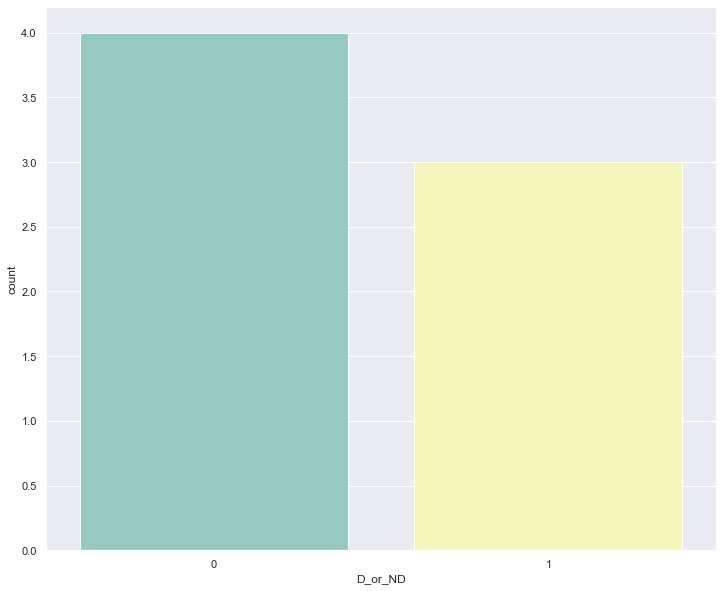

In [17]:
# Investigating the distr of all ys

ax = sns.countplot(x=y_valid, palette="Set3")


#### RUNNING LOGISTIC REGRESSION ####

In [18]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver='liblinear')

log_reg.fit(X_train, y_train)

# SKLearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


LogisticRegression(random_state=10, solver='liblinear')

In [19]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below


#### EVALUATING THE MODEL ####

array([[0.648296, -1.039793, 1.293442, -0.294009, -0.182762]])

In [20]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))


The Training Accuracy is:  0.88
The Testing Accuracy is:  0.7857142857142857
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.85      0.92      0.88        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



In [21]:
# Confusion Matrix function


def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes,
                    vmin=0., vmax=1., annot=True, annot_kws={'size': 50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



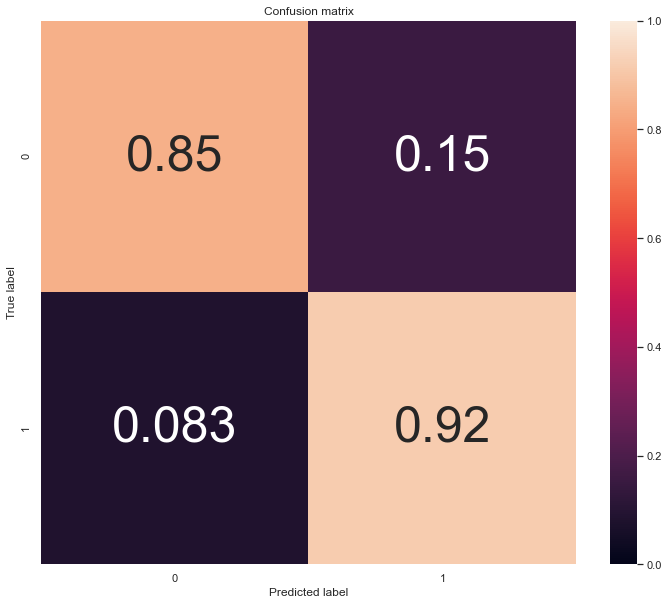

In [22]:
# Visualizing cm
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1, 1)

plot_confusion_matrix(cm_norm, classes=log_reg.classes_,
                      title='Confusion matrix')


In [23]:
log_reg.classes_


array([0, 1])

In [24]:
cm.sum(axis=1)
cm_norm


array([[0.846154, 0.153846],
       [0.083333, 0.916667]])

In [25]:
cm


array([[11,  2],
       [ 1, 11]])

In [26]:
cm.sum(axis=0)


array([12, 13])

In [27]:
np.diag(cm)


array([11, 11])

In [28]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)


# Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

# Logarithmic loss - or Log Loss - or cross-entropy loss
# Log Loss is an error metric
# This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions.
# Why it's important? For example, imagine having 2 models / classifiers that both predict one observation correctly (Good Loan). However, 1 classifier has a predicted probability of 0.54 and the other 0.95. Which one will you choose? Classification Accuracy will not help here as it will get both on 100%
# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

######

The True Positive Rate is: [0.846154 0.916667]
The Precision is: [0.916667 0.846154]
The False positive rate is: [0.083333 0.153846]
The False Negative Rate is:  [0.153846 0.083333]

The average TPR is: 0.8814102564102564
The average Precision is: 0.8814102564102564
The average False positive rate is: 0.11858974358974358
The average False Negative Rate is: 0.11858974358974358


In [29]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))


##### HYPER PARAMETER TUNING ###
# We will loop over parameter C (Inverse of regularization strength).
# Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
# It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
# The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

The Log Loss on Training is:  0.3078109456150583
The Log Loss on Testing Dataset is:  0.5781345186539524


In [30]:
np.geomspace(1e-5, 1e5, num=20)


array([0.000010, 0.000034, 0.000113, 0.000379, 0.001274, 0.004281,
       0.014384, 0.048329, 0.162378, 0.545559, 1.832981, 6.158482,
       20.691381, 69.519280, 233.572147, 784.759970, 2636.650899,
       8858.667904, 29763.514416, 100000.000000])

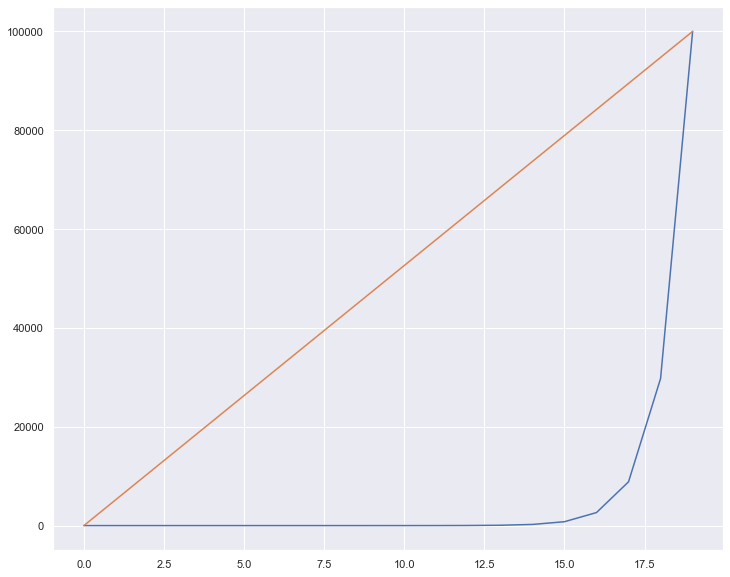

In [31]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20))  # uniformly distributed in log space
# uniformly distributed in linear space, instead of log space
plt.plot(np.linspace(1e-5, 1e5, num=20))
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace


In [32]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver='liblinear', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")



The CA of C parameter 1e-05 is 0.6428571428571429:
The Logg Loss of C parameter 1e-05 is 0.6930476462694797:

The CA of C parameter 3.359818286283781e-05 is 0.6428571428571429:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6928136199080935:

The CA of C parameter 0.00011288378916846884 is 0.6428571428571429:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6920359346050784:

The CA of C parameter 0.000379269019073225 is 0.6428571428571429:
The Logg Loss of C parameter 0.000379269019073225 is 0.6895137937480532:

The CA of C parameter 0.0012742749857031334 is 0.7142857142857143:
The Logg Loss of C parameter 0.0012742749857031334 is 0.6818719520712299:

The CA of C parameter 0.004281332398719391 is 0.8571428571428571:
The Logg Loss of C parameter 0.004281332398719391 is 0.6616390123530376:

The CA of C parameter 0.01438449888287663 is 0.8571428571428571:
The Logg Loss of C parameter 0.01438449888287663 is 0.6157076209470879:

The CA of C parameter 0.04832930238571752 is

In [33]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

# df
df_outcomes = pd.DataFrame(
    outcomes, columns=["C_List", 'CA2', 'Logarithmic_Loss2'])

# print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending=True).reset_index()

#C skal være 0.162378 for lowest logg loss (0.478681) med en CA på 0.785714



,index,C_List,CA2,Logarithmic_Loss2
0,8,0.162378,0.785714,0.478681
1,9,0.545559,0.785714,0.519950
2,7,0.048329,0.785714,0.536100
3,6,0.014384,0.857143,0.615708
4,10,1.832981,0.785714,0.659346
5,5,0.004281,0.857143,0.661639
6,4,0.001274,0.714286,0.681872
7,3,0.000379,0.642857,0.689514
8,2,0.000113,0.642857,0.692036
9,1,0.000034,0.642857,0.692814


In [34]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression
# with builtin cross-validation to find out the optimal C parameter

kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(
    cv=kf, random_state=15, Cs=C_List, solver='liblinear')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)

The CA is: 0.7857142857142857
The Logistic Loss is:  0.5199500181780992
The optimal C parameter is:  [0.545559]


In [35]:
# Training a Dummy Classifier


dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

# Testing Acc: 0.4
# Log Loss: 20.72326583694641
# Pæn dårlig dummy classifier

# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html


# FINAL MODEL WITH SELECTED PARAMETERS

Testing Acc: 0.35714285714285715
Log Loss: 22.203499111014008


In [36]:
# Final Model
#C-parameter: 0.048329

log_reg3 = LogisticRegression(random_state=10, solver='liblinear', C=0.162378)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

#Testing Acc: 1.0
#Log Loss: 0.47813132956680154


Testing Acc: 0.8571428571428571
Log Loss: 0.445375503962845
